# Predicting consumption based on gas type used

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the data from the CSV file
data = pd.read_csv('measurements.csv')

# Convert categorical variables to numeric values
data['gas_type'] = data['gas_type'].map({'SP98': 1, 'E10': 0})
data['AC'] = data['AC'].astype(int)
data['rain'] = data['rain'].astype(int)
data['sun'] = data['sun'].astype(int)
data['temp_outside'] = data['temp_outside'].astype(int)
data['consume'] = data['consume'].apply(lambda x: float(x.replace(',', '.')))
data['distance'] = data['distance'].apply(lambda x: float(x.replace(',', '.')))
data['temp_inside'] = data['temp_inside'].astype(str)

In [29]:
data['temp_inside'] = data['temp_inside'].apply(lambda x: float(x.replace(',', '.')))

In [30]:
data.head(4)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,0,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,0,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,0,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,0,0,0,0,NaN,NaN


In [31]:
data = data.drop(["specials", "refill liters", "refill gas"], axis=1)
data.head(5)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0


In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,376.0,21.929521,1.010455,19.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
gas_type,388.0,0.587629,0.492897,0.0,0.00,1.0,1.0,1.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0


In [33]:
# Checking NaNs after dropping unneeded columns
data.isna().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
dtype: int64

In [34]:
# Dropping NaNs of temp_inside because imputing with mean or else would be too inaccurate since it depends on outside temp. 
# Alternative: Could build prediction model to predict inside temp from outside temp, given more time 
# but 12 values aren't to bad to loose with almost 400

data = data.dropna(subset=['temp_inside'])

## Looking at the distribution and correlation

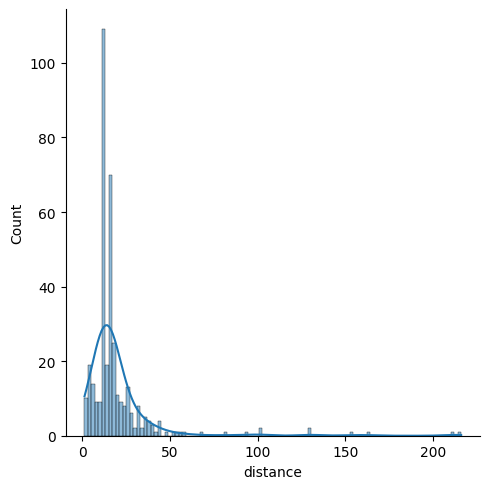

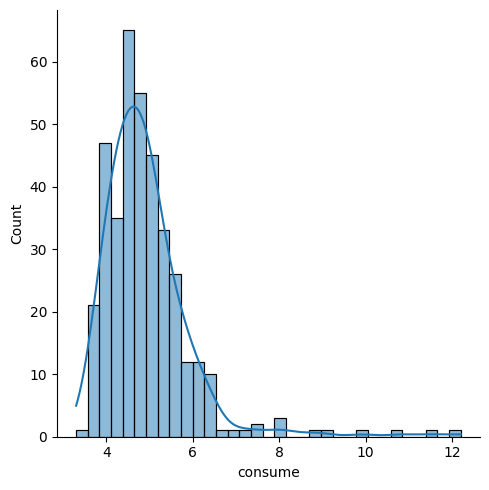

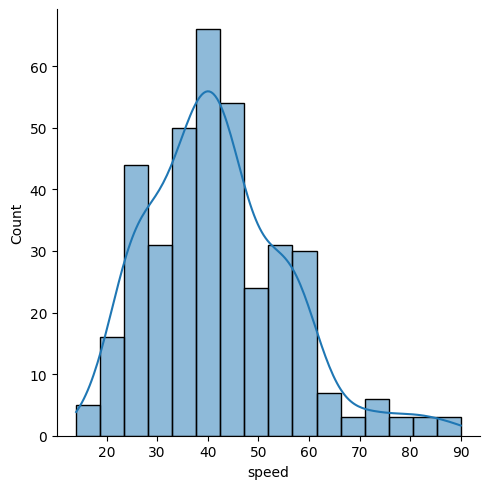

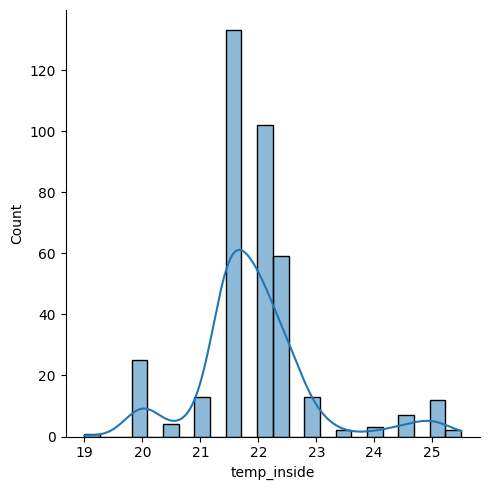

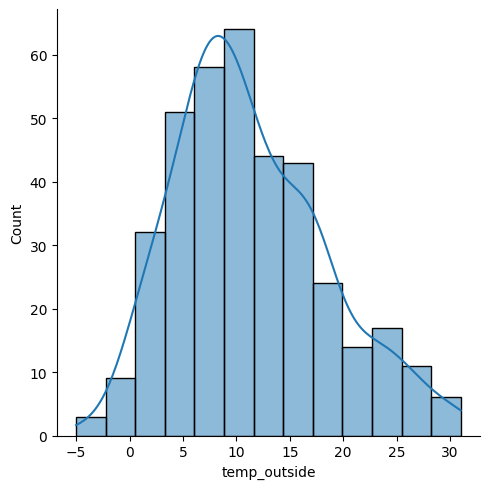

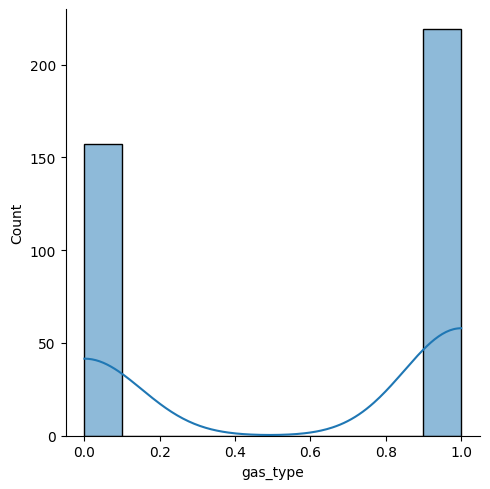

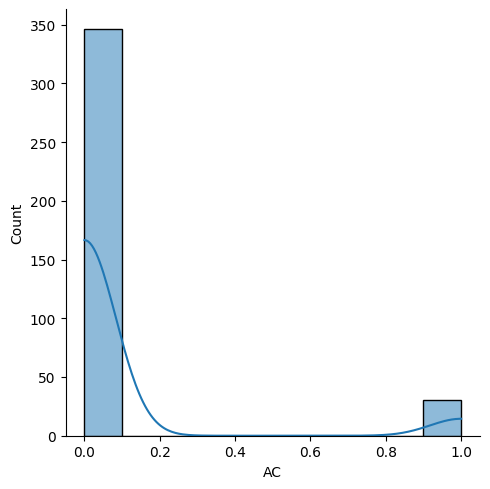

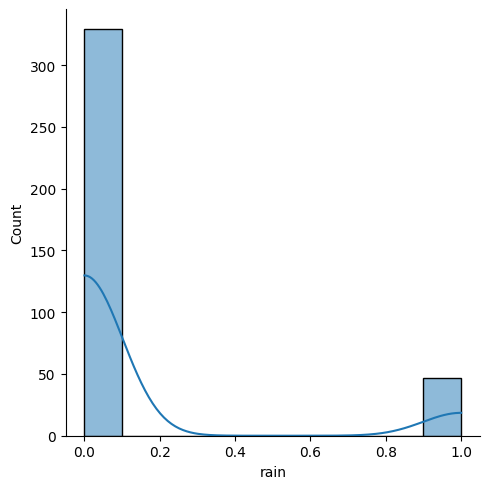

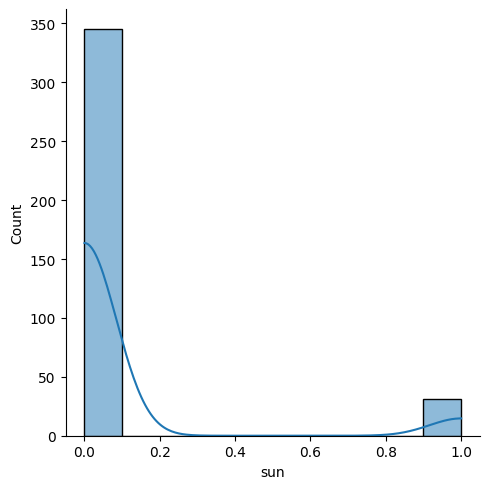

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
# create a separate distribution plot for every column
for col in data.columns:
    sns.displot(data[col], kde=True)

<AxesSubplot:>

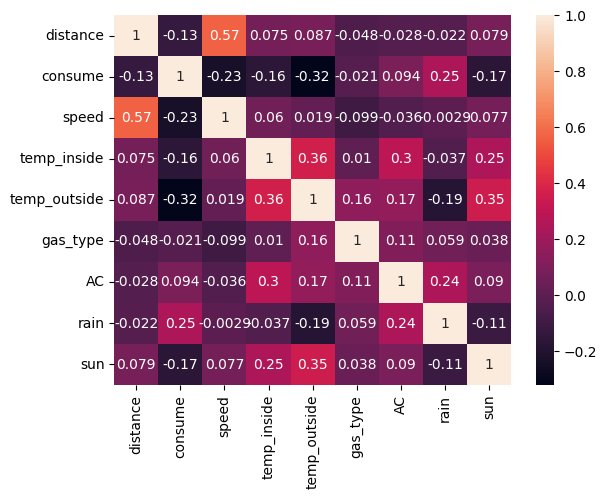

In [44]:
# compute the correlation matrix
corr = data.corr()

# create a correlation heatmap
sns.heatmap(corr, annot=True)

## Modell testing time - using different models and choosing best one

In [45]:
# Split the data into training and testing sets
X = data.drop(['consume'], axis=1)
y = data['consume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of machine learning models to try
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(random_state=42)
]

# Train and evaluate each model on the training and testing sets
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(type(model).__name__)
    print('R-squared:', r2)
    print('MSE:', mse)

# Select the best model based on its performance on the testing set
best_model = max(models, key=lambda model: r2_score(y_test, model.predict(X_test)))
print('Best model:', type(best_model).__name__)

LinearRegression
R-squared: 0.20347449649547367
MSE: 0.793293066211911
DecisionTreeRegressor
R-squared: 0.3964321971435325
MSE: 0.6011184210526316
RandomForestRegressor
R-squared: 0.716340033939479
MSE: 0.2825088252010234
GradientBoostingRegressor
R-squared: 0.6265432501346266
MSE: 0.3719411982350332
Best model: RandomForestRegressor


In [48]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('measurements.csv')

# Convert categorical variables to numeric values
# data['gas_type'] = data['gas_type'].map({'SP98': 1, 'E10': 0})
data['AC'] = data['AC'].astype(int)
data['rain'] = data['rain'].astype(int)
data['sun'] = data['sun'].astype(int)
data['temp_outside'] = data['temp_outside'].astype(int)
data['consume'] = data['consume'].apply(lambda x: float(x.replace(',', '.')))
data['distance'] = data['distance'].apply(lambda x: float(x.replace(',', '.')))
data['temp_inside'] = data['temp_inside'].astype(str)
data['temp_inside'] = data['temp_inside'].apply(lambda x: float(x.replace(',', '.')))


# Add a new column to the data with the cost of the gas for each trip
data['gas_cost'] = data['consume'] / 100 * (1.38 if data['gas_type'] == 'E10' else 1.46)

# Add a new column to the data with the total cost of each trip (including gas and any AC usage)
data['total_cost'] = data['distance'] / 100 * data['gas_cost']

# Calculate the total cost for each gas type
e10_cost = data[data['gas_type'] == 'E10']['total_cost'].sum()
sp98_cost = data[data['gas_type'] == 'SP98']['total_cost'].sum()

# Print the results
if e10_cost < sp98_cost:
    print('Using E10 is cheaper overall.')
elif sp98_cost < e10_cost:
    print('Using SP98 is cheaper overall.')
else:
    print('E10 and SP98 have the same overall cost.')


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# Load the data from the CSV file
data = pd.read_csv('measurements.csv')

# Convert categorical variables to numeric values
# data['gas_type'] = data['gas_type'].map({'SP98': 1, 'E10': 0})
data['AC'] = data['AC'].astype(int)
data['rain'] = data['rain'].astype(int)
data['sun'] = data['sun'].astype(int)
data['temp_outside'] = data['temp_outside'].astype(int)
data['consume'] = data['consume'].apply(lambda x: float(x.replace(',', '.')))
data['distance'] = data['distance'].apply(lambda x: float(x.replace(',', '.')))
data['temp_inside'] = data['temp_inside'].astype(str)
data['temp_inside'] = data['temp_inside'].apply(lambda x: float(x.replace(',', '.')))


# Add a new column to the data with the cost of the gas for each trip
data['gas_cost'] = data['consume'] / 100 * (1.38 if data['gas_type'] == 'E10' else 1.46)

In [50]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('measurements.csv')
data['consume'] = data['consume'].apply(lambda x: float(x.replace(',', '.')))
data['distance'] = data['distance'].apply(lambda x: float(x.replace(',', '.')))

# Add a new column to the data with the cost of the gas for each trip
data['gas_cost'] = data['consume'] / 100 * (1.38 if data['gas_type'] == 'E10' else 1.46)

# Add a new column to the data with the total cost of each trip (including gas and any AC usage)
data['total_cost'] = data['distance'] / 100 * data['gas_cost'] + data['AC'] * 0.3

# Calculate the total cost for each gas type
e10_cost = data[data['gas_type'] == 'E10']['total_cost'].sum()
sp98_cost = data[data['gas_type'] == 'SP98']['total_cost'].sum()

# Print the results
if e10_cost < sp98_cost:
    print('Using E10 is cheaper overall.')
elif sp98_cost < e10_cost:
    print('Using SP98 is cheaper overall.')
else:
    print('E10 and SP98 have the same overall cost.')


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [52]:
import pandas as pd
import numpy as np

# Load the data from the CSV file
data = pd.read_csv('measurements.csv')
data['consume'] = data['consume'].apply(lambda x: float(x.replace(',', '.')))
data['distance'] = data['distance'].apply(lambda x: float(x.replace(',', '.')))

# Add a new column to the data with the cost of the gas for each trip
data['gas_cost'] = np.where(data['gas_type'] == 'E10', 1.38, 1.46) * data['consume'] / 100

# Add a new column to the data with the total cost of each trip (including gas and any AC usage)
data['total_cost'] = data['distance'] / 100 * data['gas_cost'] + data['AC'] * 0.3

# Calculate the total cost for each gas type
e10_cost = data[data['gas_type'] == 'E10']['total_cost'].sum()
sp98_cost = data[data['gas_type'] == 'SP98']['total_cost'].sum()

# Print the results
if e10_cost < sp98_cost:
    print('Using E10 is cheaper overall.')
elif sp98_cost < e10_cost:
    print('Using SP98 is cheaper overall.')
else:
    print('E10 and SP98 have the same overall cost.')


Using E10 is cheaper overall.


In [53]:
e10_cost

4.32772296

In [54]:
sp98_cost

9.841389000000001